In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import log_loss,confusion_matrix

In [2]:
raw_train_data = pd.read_csv("D:\\train.csv")
raw_test_data = pd.read_csv("D:\\test.csv")

In [3]:
print(raw_train_data.shape)
print(raw_test_data.shape)

(61878, 95)
(144368, 94)


In [4]:
Train_data = raw_train_data.iloc[:, 1:95]
labels = set(Train_data.iloc[:,93:94].target)
Valid_x = np.array(raw_test_data.iloc[:, 1:94])
Total_x = np.array(Train_data.iloc[:,0:93])
Total_y = np.array(Train_data.iloc[:,93:94])

In [5]:
print(f"The current has the following label {labels}")
print(f"The shape the Total_X {Total_x.shape}")
print(f"The shape the Total_Y {Total_y.shape}")
print(f"The shape the Valid_X {Valid_x.shape}")
print(f"Check Nan in Total_X {set(np.isnan(Total_x).any(axis=1))}")
# print(f"Check Nan in Train_Y {np.isnan(Train_Y).any(axis=1)}")
print(f"Check Nan in Valid_X {set(np.isnan(Valid_x).any(axis=1))}")

The current has the following label {'Class_2', 'Class_5', 'Class_7', 'Class_8', 'Class_9', 'Class_1', 'Class_3', 'Class_4', 'Class_6'}
The shape the Total_X (61878, 93)
The shape the Total_Y (61878, 1)
The shape the Valid_X (144368, 93)
Check Nan in Total_X {False}
Check Nan in Valid_X {False}


In [6]:
# np.random.seed(10)
Total_X,Total_Y = shuffle(Total_x,Total_y)

In [7]:
# In this part using the previous 50000 to do the training and the last data to do the test check the score
Train_X = Total_X[:50000]
Train_Y = Total_Y[:50000]
Test_X = Total_X[50000:]
Test_Y = Total_Y[50000:]
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(50000, 93)
(50000, 1)
(11878, 93)
(11878, 1)


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
GNB_model = GaussianNB()
MNB_model = MultinomialNB()
BNB_model = BernoulliNB()
GNB_model.fit(Train_X, Train_Y.ravel())
MNB_model.fit(Train_X, Train_Y.ravel())
BNB_model.fit(Train_X, Train_Y.ravel())

In [ ]:
print(Test_X.shape)

(11878, 93)


In [ ]:
Y_pred_GNB = GNB_model.predict(Test_X)
y_pred_GNB_Train = GNB_model.predict(Train_X)
Y_pred_proba_GNB = GNB_model.predict_proba(Test_X)
Y_pred_MNB = MNB_model.predict(Test_X)
y_pred_MNB_Train = MNB_model.predict(Train_X)
Y_pred_MNB_proba = MNB_model.predict_proba(Test_X)
Y_pred_BNB = BNB_model.predict(Test_X)
y_pred_BNB_Train = BNB_model.predict(Train_X)
Y_pred_BNB_proba = BNB_model.predict_proba(Test_X)

In [ ]:
print(Y_pred_GNB)
print(Y_pred_MNB)
print(Y_pred_BNB)

['Class_5' 'Class_3' 'Class_9' ... 'Class_1' 'Class_2' 'Class_7']
['Class_5' 'Class_7' 'Class_9' ... 'Class_9' 'Class_2' 'Class_7']
['Class_5' 'Class_2' 'Class_9' ... 'Class_9' 'Class_9' 'Class_7']


In [ ]:
normal_GNB_report = metrics.classification_report(Test_Y,Y_pred_GNB)
log_loss_result_GNB = log_loss(Test_Y, Y_pred_proba_GNB)
normal_MNB_report = metrics.classification_report(Test_Y,Y_pred_MNB)
log_loss_result_MNB = log_loss(Test_Y, Y_pred_MNB_proba)
normal_BNB_report = metrics.classification_report(Test_Y,Y_pred_BNB)
log_loss_result_BNB = log_loss(Test_Y, Y_pred_BNB_proba)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
GNB_Train_acc = accuracy_score(Train_Y,y_pred_GNB_Train)
MNB_Train_acc = accuracy_score(Train_Y,y_pred_MNB_Train)
BNB_Train_acc = accuracy_score(Train_Y,y_pred_BNB_Train)

In [ ]:
print("The report of GaussianNB")
print(normal_GNB_report)
print(f"The log loss of GaussianNB {log_loss_result_GNB}")
print(f"The Train Accuracy of GaussianNB {GNB_Train_acc}")
print()
print("The report of MultinomialNB")
print(normal_MNB_report)
print(f"The log loss of MultinomialNB {log_loss_result_MNB}")
print(f"The Train Accuracy of MultinomialNB {MNB_Train_acc}")
print()
print("The report of BernoulliNB")
print(normal_BNB_report)
print(f"The log loss of BernoulliNB {log_loss_result_BNB}")
print(f"The Train Accuracy of BernoulliNB {BNB_Train_acc}")

The report of GaussianNB
              precision    recall  f1-score   support

     Class_1       0.22      0.30      0.25       394
     Class_2       0.66      0.62      0.64      3087
     Class_3       0.42      0.25      0.31      1543
     Class_4       0.22      0.58      0.32       506
     Class_5       0.45      0.95      0.61       517
     Class_6       0.94      0.78      0.85      2712
     Class_7       0.43      0.51      0.47       553
     Class_8       0.90      0.52      0.66      1595
     Class_9       0.59      0.77      0.67       971

    accuracy                           0.60     11878
   macro avg       0.54      0.59      0.53     11878
weighted avg       0.67      0.60      0.61     11878

The log loss of GaussianNB 7.468375066857119
The Train Accuracy of GaussianNB 7.468375066857119

The report of MultinomialNB
              precision    recall  f1-score   support

     Class_1       0.25      0.53      0.34       394
     Class_2       0.71      0.64   

In [ ]:
checking_test_label={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_GNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_MNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}
Test_BNB_counter={"Class_1":0,"Class_2":0,"Class_3":0,"Class_4":0,"Class_5":0,"Class_6":0,"Class_7":0,"Class_8":0,"Class_9":0}

In [ ]:
print(Y_pred_GNB)

['Class_5' 'Class_3' 'Class_9' ... 'Class_1' 'Class_2' 'Class_7']


In [ ]:
for item in Test_Y:
    checking_test_label[item[-1]] += 1
print(checking_test_label)

for item in Y_pred_GNB:
    Test_GNB_counter[item] += 1
print(Test_GNB_counter)

for item in Y_pred_MNB:
    Test_MNB_counter[item] += 1
print(Test_MNB_counter)

for item in Y_pred_BNB:
    Test_BNB_counter[item] += 1
print(Test_BNB_counter)

{'Class_1': 394, 'Class_2': 3087, 'Class_3': 1543, 'Class_4': 506, 'Class_5': 517, 'Class_6': 2712, 'Class_7': 553, 'Class_8': 1595, 'Class_9': 971}
{'Class_1': 536, 'Class_2': 2901, 'Class_3': 916, 'Class_4': 1340, 'Class_5': 1096, 'Class_6': 2234, 'Class_7': 663, 'Class_8': 923, 'Class_9': 1269}
{'Class_1': 828, 'Class_2': 2773, 'Class_3': 1066, 'Class_4': 1364, 'Class_5': 561, 'Class_6': 2447, 'Class_7': 564, 'Class_8': 1136, 'Class_9': 1139}
{'Class_1': 550, 'Class_2': 3700, 'Class_3': 939, 'Class_4': 480, 'Class_5': 777, 'Class_6': 2282, 'Class_7': 718, 'Class_8': 1316, 'Class_9': 1116}


In [ ]:
import matplotlib.pyplot as plt

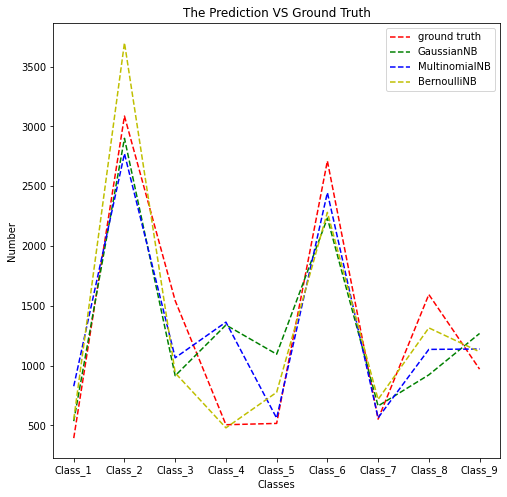

In [ ]:
plt.figure(figsize=(8, 8))
l1=plt.plot(checking_test_label.keys(),checking_test_label.values(),'r--',label='ground truth')
l2=plt.plot(Test_GNB_counter.keys(),Test_GNB_counter.values(),'g--',label='GaussianNB')
l3=plt.plot(Test_MNB_counter.keys(),Test_MNB_counter.values(),'b--',label='MultinomialNB')
l4=plt.plot(Test_BNB_counter.keys(),Test_BNB_counter.values(),'y--',label='BernoulliNB')

plt.title('The Prediction VS Ground Truth')
plt.xlabel('Classes')
plt.ylabel('Number')
plt.legend()
plt.savefig("./NB_Comparison.jpg")
plt.show()


In [ ]:
confusion_GNB = confusion_matrix(Y_pred_GNB, Test_Y)
confusion_MNB = confusion_matrix(Y_pred_MNB, Test_Y)
confusion_BNB = confusion_matrix(Y_pred_BNB, Test_Y)

No handles with labels found to put in legend.


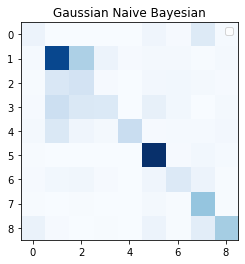

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Gaussian Naive Bayesian')
plt.legend()
plt.imshow(confusion_GNB, cmap=plt.cm.Blues)
plt.savefig("./GBN_Confusion.jpg")

No handles with labels found to put in legend.


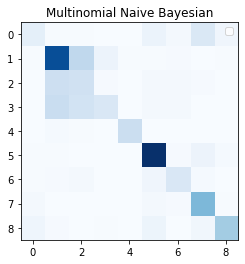

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Multinomial Naive Bayesian')
plt.legend()
plt.imshow(confusion_MNB, cmap=plt.cm.Blues)
plt.savefig("./MBN_Confusion.jpg")

No handles with labels found to put in legend.


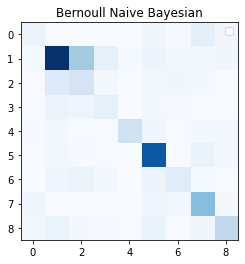

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Bernoull Naive Bayesian')
plt.legend()
plt.imshow(confusion_BNB, cmap=plt.cm.Blues)
plt.savefig("./NBN_Confusion.jpg")